In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("international-energy-statistics/all_energy_statistics.csv")

In [80]:
df = df.drop(columns=["quantity_footnotes"])

In [81]:
df = df.groupby(["category","year"]).sum()
df = df.reset_index()
df = df.pivot(index = "year",columns="category",values="quantity")

In [76]:
mapping_energies = pd.read_excel("mapping_energies.xlsx",sheet_name="Sheet1")
mapping_energies = mapping_energies.rename(columns={"Energy":"category"})
df=df[df.country_or_area=="France"]
df_merged = df.merge(mapping_energies,how="left",on="category")

df_merged = df_merged.groupby(["Type","year"]).sum()
df_merged = df_merged.reset_index()

df_merged = df_merged.pivot(index = "year",columns="Type",values = "quantity")

/home/edoumard/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


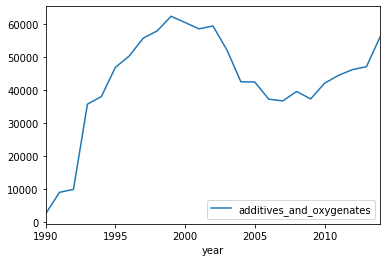

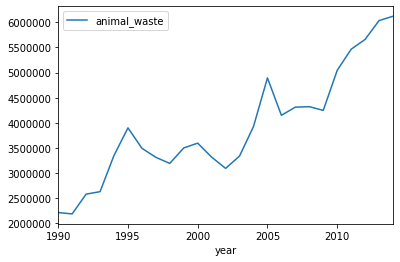

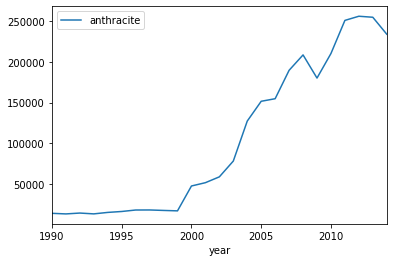

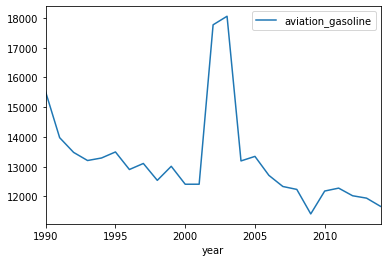

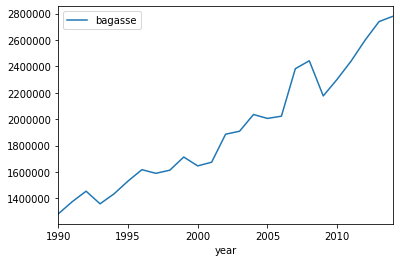

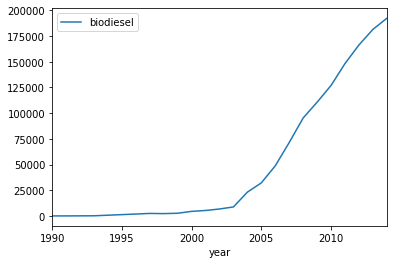

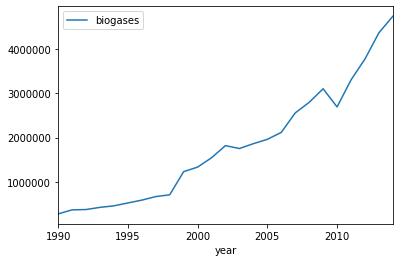

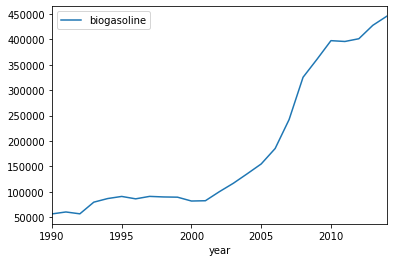

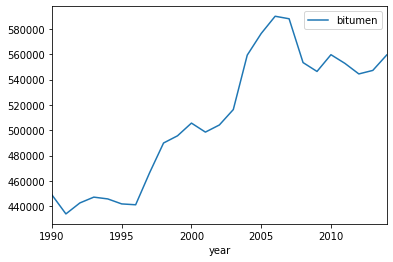

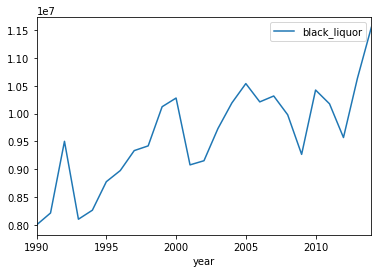

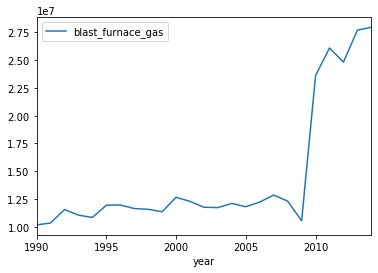

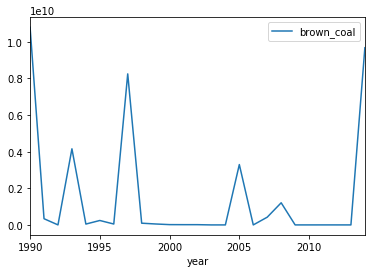

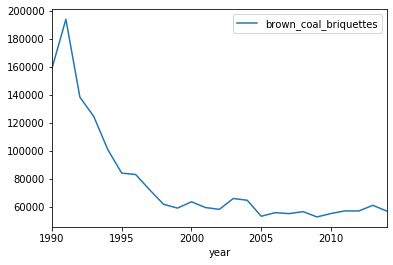

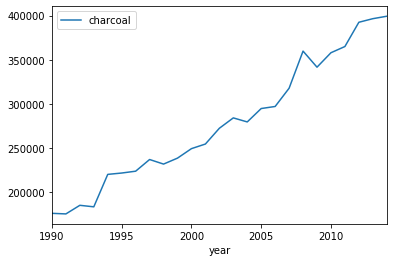

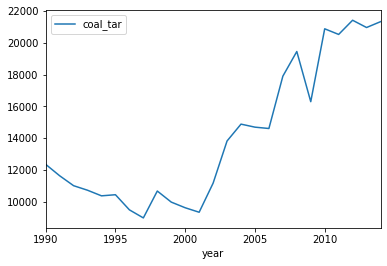

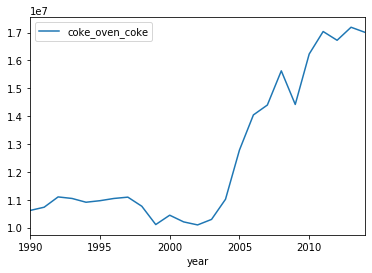

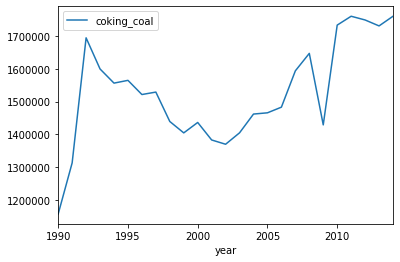

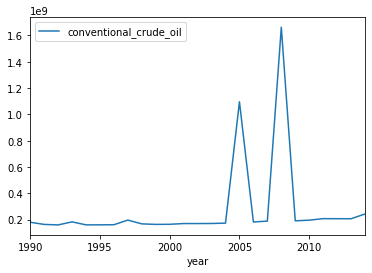

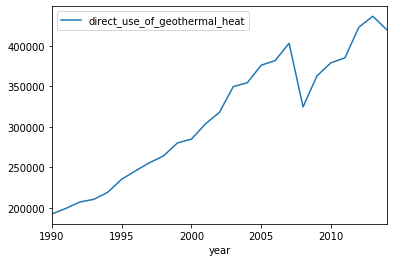

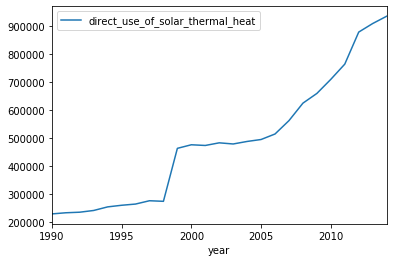

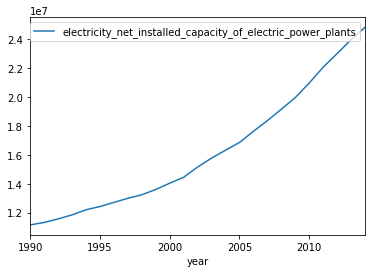

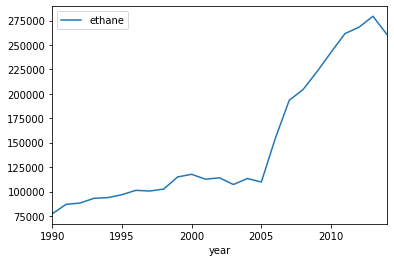

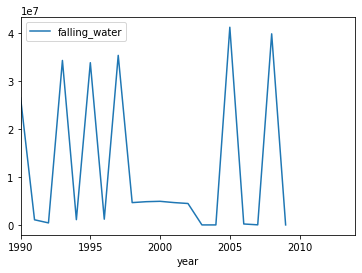

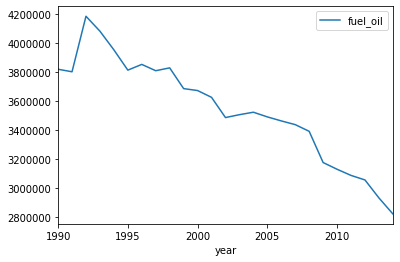

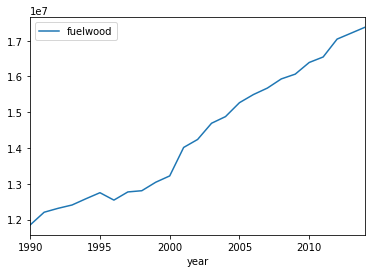

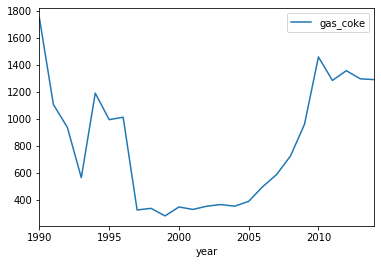

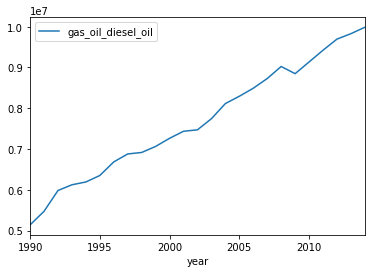

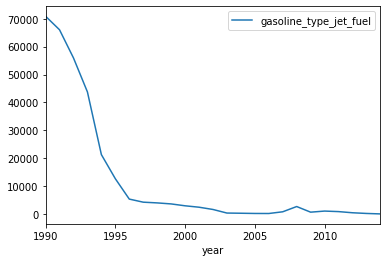

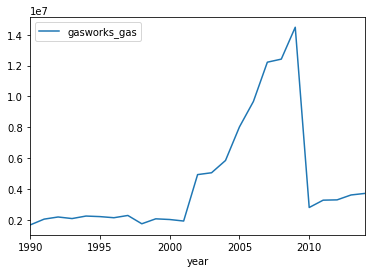

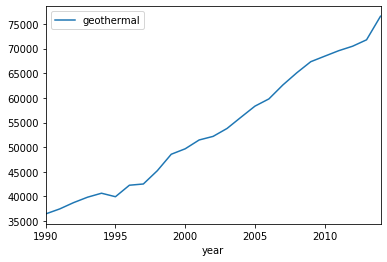

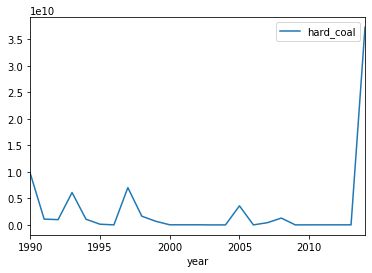

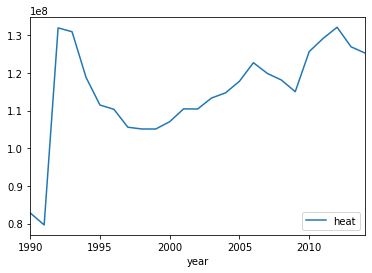

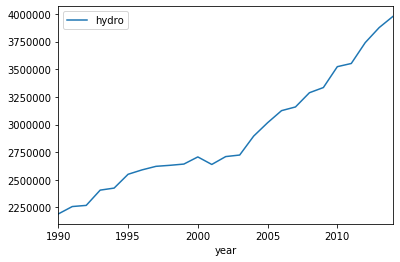

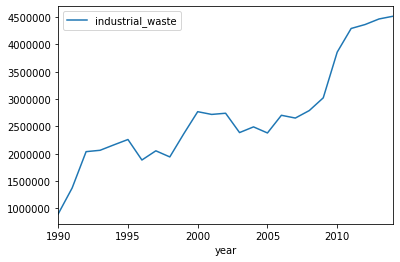

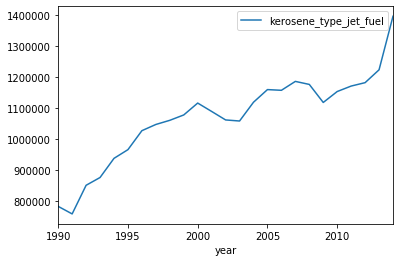

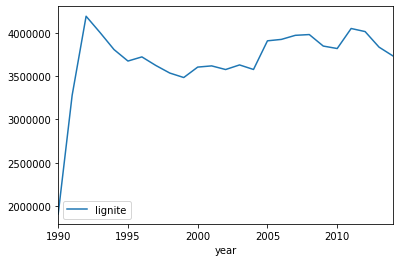

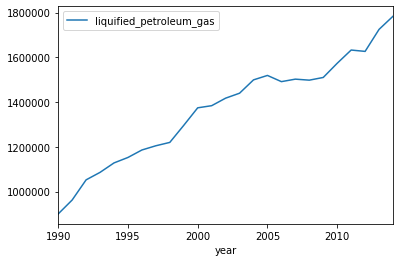

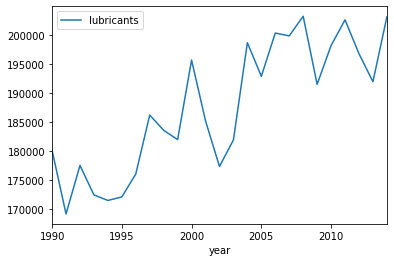

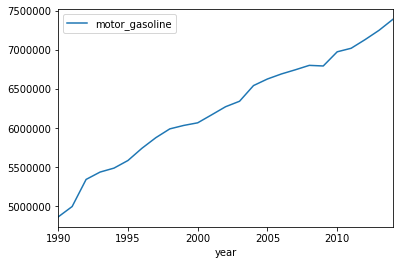

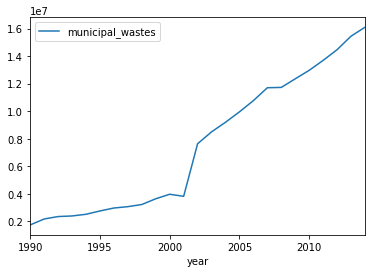

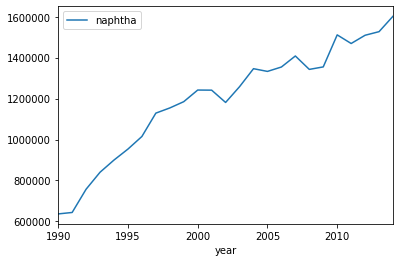

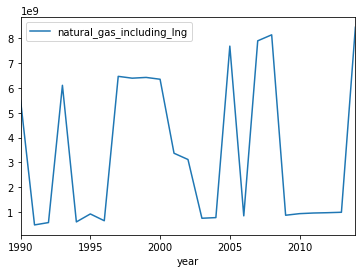

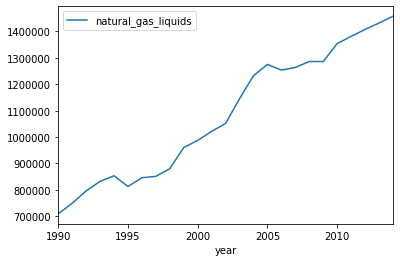

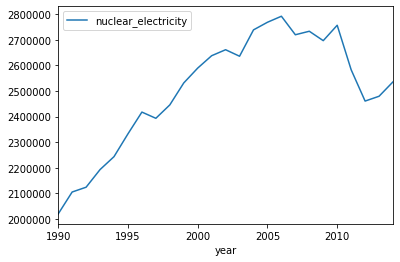

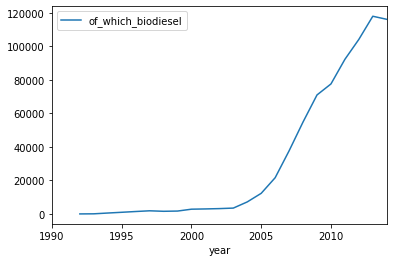

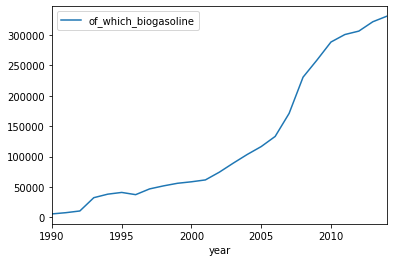

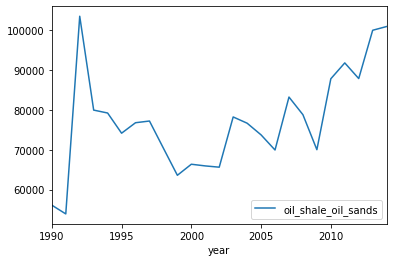

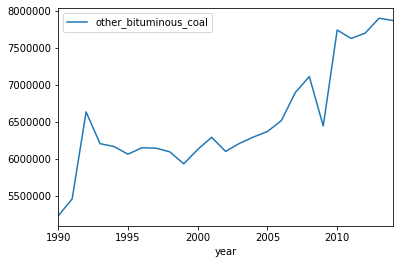

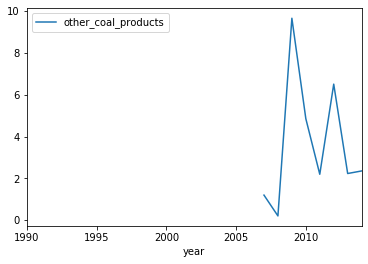

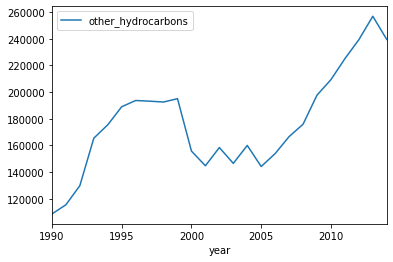

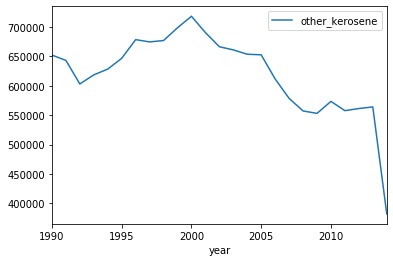

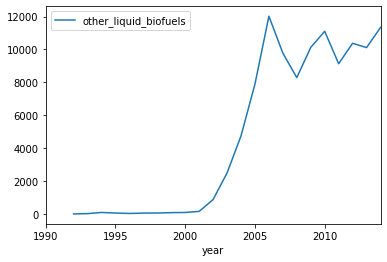

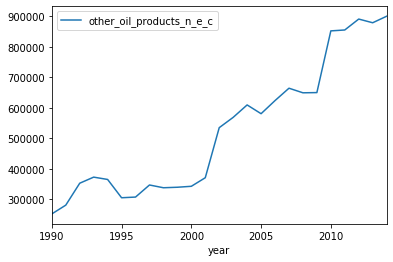

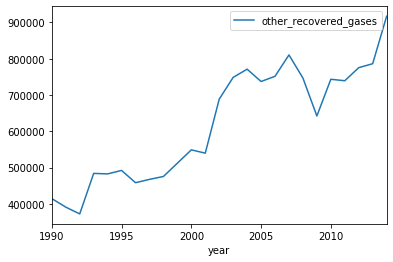

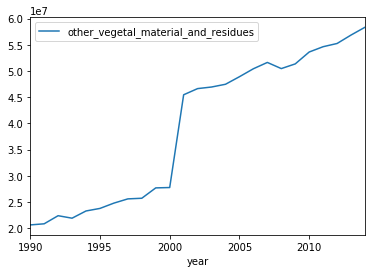

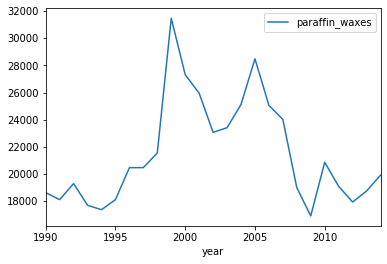

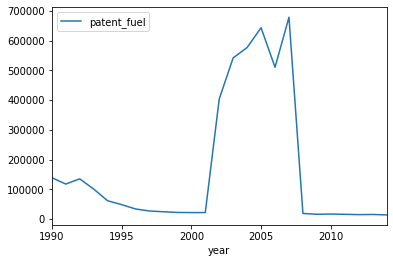

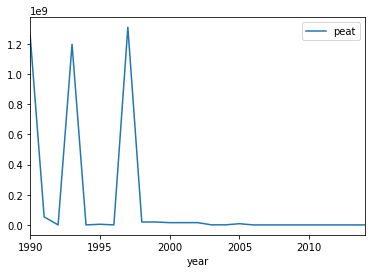

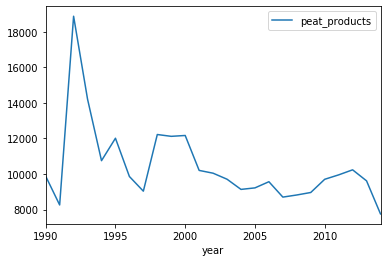

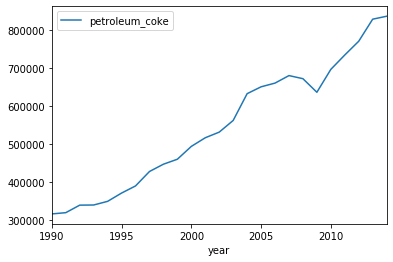

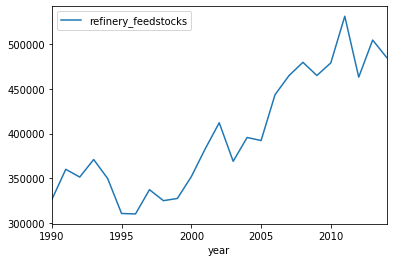

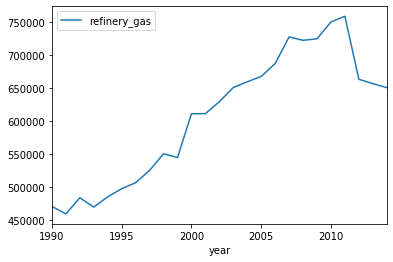

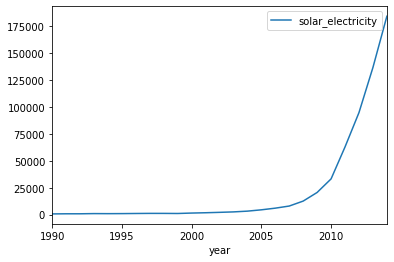

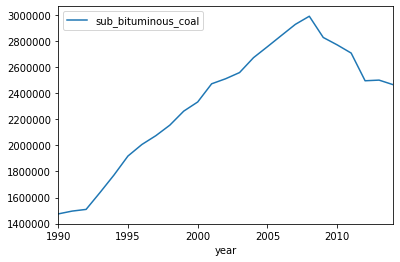

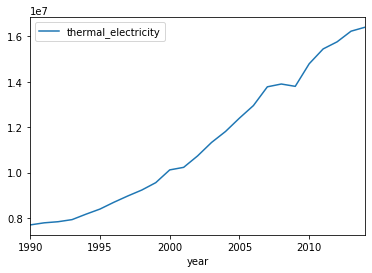

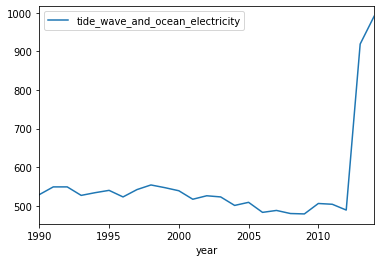

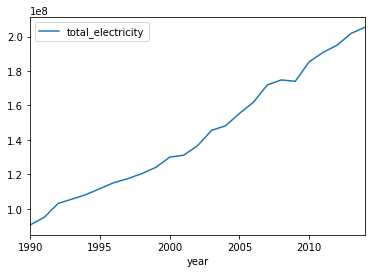

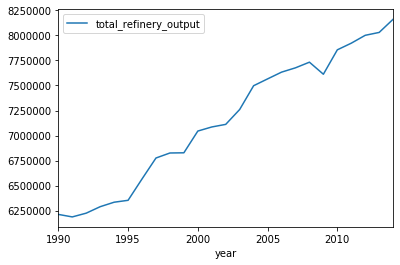

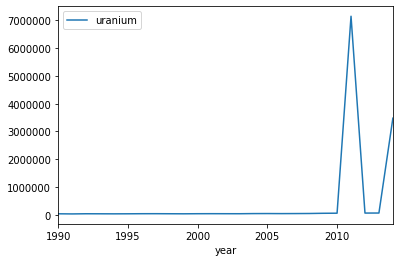

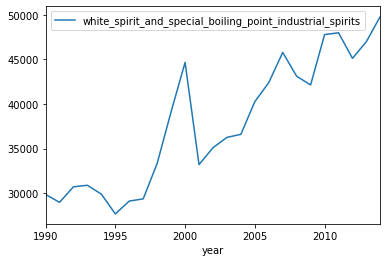

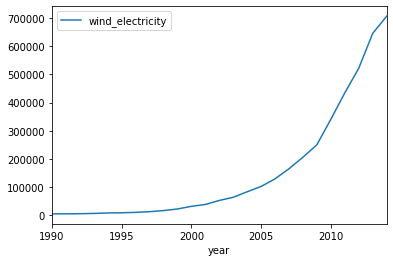

In [83]:
for i,col in enumerate(df.columns):
    df.plot(y=col)

In [65]:
df

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.00,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.00,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.00,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.00,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.00,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.00,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.00,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.00,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.00,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.00,additives_and_oxygenates


### Dataset non exploitable (unités hétérogènes...)

## Dataset bp

In [159]:
df = (pd.read_excel("bp_review_2018.xlsx",sheet_name = "Primary Energy Consumption",skiprows=2)
      .dropna(axis=0,subset=[1965]))

In [160]:
df_primary = (df#[~df["Million tonnes oil equivalent"].str.contains("Total|OECD|Asia|European")].iloc[:,:-5]
              .rename(columns ={"Million tonnes oil equivalent":"Country"})
              .set_index("Country"))

In [179]:
df_primary_continent = df[df["Million tonnes oil equivalent"].str.contains("Total|OECD|Asia")].rename(columns = {"Million tonnes oil equivalent":"Region/Continent"}).set_index("Region/Continent")
df_primary_continent = df_primary_continent.drop("Other Asia Pacific").rename(columns={"2018.1":"growth_rate_2018","2007-17":"growth_rate_2007-2017","2018.2":"percent_share"})
df_primary_continent = df_primary_continent.drop(columns=["Unnamed: 58","Unnamed: 59"])
df_primary_continent.T

Region/Continent,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East,Total Africa,Total Asia Pacific,Total World,of which: OECD,Non-OECD
1965,1390.526237,110.036724,1058.549142,593.312220,48.272526,61.130664,441.550955,3703.378469,2610.473054,1092.905415
1966,1469.462395,116.647105,1090.235204,630.907747,50.329873,63.831108,482.885313,3904.298745,2741.387560,1162.911186
1967,1521.682440,121.384131,1122.618182,663.183749,52.662279,64.525757,506.079866,4052.136402,2850.277615,1201.858787
1968,1615.918698,128.970734,1197.634432,687.773150,55.584714,68.022346,544.087709,4297.991782,3039.996805,1257.994978
1969,1703.691297,135.349393,1285.272446,718.996988,58.476402,69.472253,619.804052,4591.062831,3244.639856,1346.422975
1970,1767.759372,143.209527,1368.664099,754.806239,61.477110,75.310198,704.886495,4876.113040,3421.875974,1454.237066
1971,1806.159440,158.543875,1405.938380,791.895598,65.098580,81.801706,771.425046,5080.862624,3512.874189,1567.988435
1972,1903.503145,170.652984,1472.331524,832.331112,70.810213,86.978428,817.967012,5354.574417,3691.937919,1662.636498
1973,1986.551556,187.567113,1557.319727,875.083522,77.598143,93.517768,885.102269,5662.740097,3898.058005,1764.682093
1974,1952.001051,196.849598,1534.763380,923.299295,82.636211,98.232768,902.151972,5689.934275,3840.937791,1848.996485


Text(0, 0.5, 'Million tons oil equivalent')

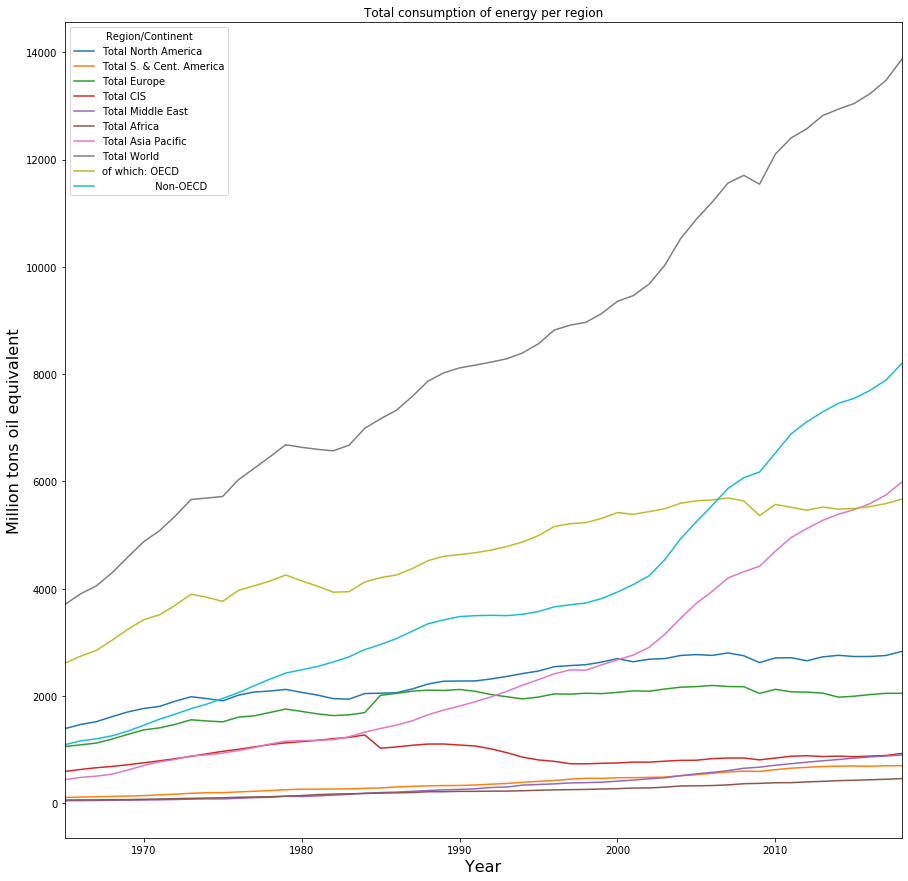

In [180]:
ax = df_primary_continent.filter(regex = "^\d{4}$").T.plot(title="Total consumption of energy per region",figsize=(15,15))
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Million tons oil equivalent",fontsize=16)

In [90]:
df_primary_continent.sort_values(["growth_rate_2018"],ascending=False)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2012,2013,2014,2015,2016,2017,2018,growth_rate_2018,growth_rate_2007-2017,percent_share
Region/Continent,,,,,,,,,,,,,,,,,,,,,
Total CIS,593.312220,630.907747,663.183749,687.773150,718.996988,754.806239,791.895598,832.331112,875.083522,923.299295,...,886.719062,872.121065,880.276487,867.876324,881.472275,891.243440,930.532094,0.044083,0.005406,0.067114
Total Asia Pacific,441.550955,482.885313,506.079866,544.087709,619.804052,704.886495,771.425046,817.967012,885.102269,902.151972,...,5121.641142,5274.376858,5389.628956,5475.671246,5586.958305,5748.038504,5985.840397,0.041371,0.031867,0.431727
Non-OECD,1092.905415,1162.911186,1201.858787,1257.994978,1346.422975,1454.237066,1567.988435,1662.636498,1764.682093,1848.996485,...,7111.651426,7296.763459,7456.274734,7549.853021,7697.951769,7887.735639,8195.851327,0.039063,0.029998,0.591123
Total World,3703.378469,3904.298745,4052.136402,4297.991782,4591.062831,4876.113040,5080.862624,5354.574417,5662.740097,5689.934275,...,12575.492926,12819.426466,12939.768026,13045.577228,13228.584123,13474.602171,13864.882686,0.028964,0.015427,1.000000
Total Africa,61.130664,63.831108,64.525757,68.022346,69.472253,75.310198,81.801706,86.978428,93.517768,98.232768,...,399.237196,409.722131,422.587727,430.084660,439.438008,448.606169,461.513029,0.028771,0.027078,0.033286
Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,...,2657.360511,2730.079131,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273,0.027763,-0.001726,0.204255
Total Middle East,48.272526,50.329873,52.662279,55.584714,58.476402,61.477110,65.098580,70.810213,77.598143,82.636211,...,767.344259,792.512186,817.168090,843.671994,864.907431,881.384972,902.288902,0.023717,0.037525,0.065077
of which: OECD,2610.473054,2741.387560,2850.277615,3039.996805,3244.639856,3421.875974,3512.874189,3691.937919,3898.058005,3840.937791,...,5463.841500,5522.663007,5483.493293,5495.724206,5530.632354,5586.866532,5669.031359,0.014707,-0.001873,0.408877
Total S. & Cent. America,110.036724,116.647105,121.384131,128.970734,135.349393,143.209527,158.543875,170.652984,187.567113,196.849598,...,670.856716,685.932686,692.892412,695.279032,691.111200,699.827751,702.014370,0.003125,0.018443,0.050633


In [93]:
df_primary

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2018.1,2007-17,2018.2,Unnamed: 58,Unnamed: 59
Country,,,,,,,,,,,,,,,,,,,,,
Canada,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,187.556717,...,341.813863,339.043046,338.223484,343.696739,344.424157,0.002116,0.006524,0.024841,NaN,NaN
Mexico,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,47.492627,...,184.141764,183.970404,186.358373,189.300608,186.913820,-0.012608,0.012453,0.013481,NaN,NaN
US,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,1716.951707,...,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296,0.035168,-0.004035,0.165933,NaN,NaN
Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,...,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273,0.027763,-0.001726,0.204255,NaN,NaN
Argentina,26.914442,27.809713,28.635373,29.623572,30.644712,28.937326,30.747979,31.299226,32.626256,34.004124,...,84.127455,86.098900,85.917292,86.103674,85.052439,-0.012209,0.016172,0.006134,NaN,NaN
Brazil,22.486225,24.529219,25.404553,29.122828,31.813745,37.369778,40.871057,47.072428,56.155980,61.315547,...,299.386207,295.949648,289.439294,293.888754,297.595143,0.012612,0.025151,0.021464,NaN,NaN
Chile,6.168698,6.613177,6.743298,6.736549,7.251696,7.652044,8.176603,8.414433,8.137984,8.029560,...,35.074363,35.914724,37.667186,38.308464,40.097238,0.046694,0.016600,0.002892,NaN,NaN
Colombia,7.544647,8.219919,8.748266,9.212941,9.366090,10.216603,10.035473,11.273758,11.249493,12.604610,...,41.011439,41.306728,44.243020,45.510476,46.948342,0.031594,0.040042,0.003386,NaN,NaN
Ecuador,0.759052,0.800070,0.866940,1.020639,1.086028,1.293278,1.421773,1.588087,1.581186,1.825694,...,16.108058,16.071330,16.026907,16.660919,17.626758,0.057970,0.038870,0.001271,NaN,NaN


In [181]:
df_primary_per_capita = df.rename(columns = {"Million tonnes oil equivalent":"Country/Region"}).set_index("Country/Region")
df_primary_per_capita = df_primary_per_capita.drop("Other Asia Pacific").rename(columns={"2018.1":"growth_rate_2018","2007-17":"growth_rate_2007-2017","2018.2":"percent_share"})
df_primary_per_capita = df_primary_per_capita.drop(columns=["Unnamed: 58","Unnamed: 59"])
df_primary_per_capita.T

Country/Region,Canada,Mexico,US,Total North America,Argentina,Brazil,Chile,Colombia,Ecuador,Peru,...,South Korea,Sri Lanka,Taiwan,Thailand,Vietnam,Total Asia Pacific,Total World,of which: OECD,Non-OECD,European Union #
1965,115.910849,24.972964,1249.642424,1390.526237,26.914442,22.486225,6.168698,7.544647,0.759052,4.784962,...,6.413232,0.554163,6.223167,2.674457,2.523158,441.550955,3703.378469,2610.473054,1092.905415,1002.520198
1966,122.991657,26.432788,1320.037950,1469.462395,27.809713,24.529219,6.613177,8.219919,0.800070,5.824951,...,7.777103,0.573235,6.667602,3.163960,4.415730,482.885313,3904.298745,2741.387560,1162.911186,1030.697339
1967,129.026541,26.922222,1365.733676,1521.682440,28.635373,25.404553,6.743298,8.748266,0.866940,5.924197,...,8.940186,0.587419,7.217037,3.629875,6.087783,506.079866,4052.136402,2850.277615,1201.858787,1060.204794
1968,137.695457,29.291127,1448.932114,1615.918698,29.623572,29.122828,6.736549,9.212941,1.020639,6.029627,...,10.250833,0.613733,8.327757,4.597510,6.312114,544.087709,4297.991782,3039.996805,1257.994978,1128.846095
1969,145.303023,32.196346,1526.191928,1703.691297,30.644712,31.813745,7.251696,9.366090,1.086028,6.069769,...,12.370309,0.642437,8.631824,4.856973,7.456101,619.804052,4591.062831,3244.639856,1346.422975,1213.554819
1970,155.587992,34.320386,1577.850993,1767.759372,28.937326,37.369778,7.652044,10.216603,1.293278,6.333776,...,14.365312,1.203778,9.335213,5.783130,7.777148,704.886495,4876.113040,3421.875974,1454.237066,1291.007762
1971,159.794037,36.094722,1610.270681,1806.159440,30.747979,40.871057,8.176603,10.035473,1.421773,6.537182,...,15.542618,1.130512,11.541022,6.405595,6.932499,771.425046,5080.862624,3512.874189,1567.988435,1321.285407
1972,170.698240,39.916724,1692.888180,1903.503145,31.299226,47.072428,8.414433,11.273758,1.588087,5.849885,...,16.114161,1.222641,12.321749,7.821953,6.723743,817.967012,5354.574417,3691.937919,1662.636498,1384.119794
1973,181.241163,43.065295,1762.245098,1986.551556,32.626256,56.155980,8.137984,11.249493,1.581186,6.722103,...,19.941473,1.231725,14.420932,8.293867,7.097193,885.102269,5662.740097,3898.058005,1764.682093,1461.824804
1974,187.556717,47.492627,1716.951707,1952.001051,34.004124,61.315547,8.029560,12.604610,1.825694,7.796194,...,20.717929,1.076765,13.772004,8.627290,5.275451,902.151972,5689.934275,3840.937791,1848.996485,1437.321497


In [182]:
df_renewable_consumption = (pd.read_excel("bp_review_2018.xlsx",sheet_name = "Renewables - Mtoe",skiprows=2)
      .dropna(axis=0,subset=[2018]))

df_renewable_consumption = df_renewable_consumption.rename(columns = {"Million tonnes oil equivalent":"Country/Region"})


Text(0, 0.5, 'Million tons oil equivalent')

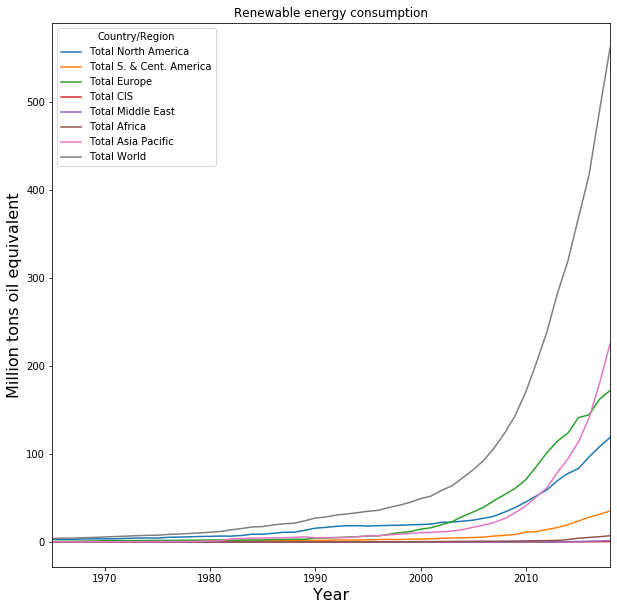

In [183]:
ax = df_renewable_consumption[df_renewable_consumption["Country/Region"].str.contains("Total")].set_index("Country/Region").filter(regex="^\d{4}$").T.plot(title="Renewable energy consumption",figsize=(10,10))
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Million tons oil equivalent",fontsize=16)